# 直流电机模型   

建立直流电机的模型，并将仿真结果写入`result.csv` 文件

In [24]:
import os,sys

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))  

import csv
from src.rk4 import  Module

J = 0.01
b = 0.1
Ke = 0.01
Kt = 0.01
R = 1
L = 0.5  
V = 0.1

motor = Module()

theta = motor.createState(name="theta", func=lambda: omega)
omega = motor.createState(name="omega", func=lambda: -b/J*omega + Kt/J*i)
i = motor.createState(name="i", func=lambda: -Ke/L*omega + -R/L*i + V/L)


my_array = motor.run()

with open('result.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(my_array)


读取`result.csv` 结果，并绘制曲线图

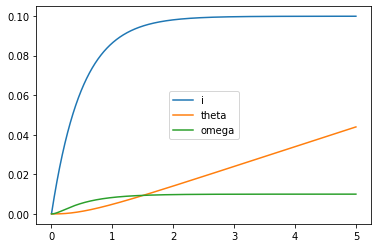

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
data = pd.read_csv('result.csv')

plt.plot(data["_time"], data['module_i'], label="i")
plt.plot(data["_time"], data['module_theta'], label="theta")
plt.plot(data["_time"], data['module_omega'], label="omega")

plt.legend()
plt.show()